# Homework 7: $k$-Nearest Neighbors and $k$-Means Clustering

Practical Assignment Objectives:
- Implement the $k$-Nearest Neighbors algorithm from scratch in order to classify and predict data
- To implement the $k$-Means algorithm from scratch in order to cluster data.

We use as reference the chapter 19 and 22 of Understanding Machine Learning.

Copy this notebook and insert the corresponding names on the file.


## Important!


1.   **You shall send this TP by mail with the subject: [HW7][Student_1]_[Student_2]** (Adapt the subject accordingly to your specific situation).

2.   **This exercise can be done in pairs. Please, leave all of your answers on this notebook, which will be the only file you will have to deliver.**

3. **You have one week to deliver the homework.**

4. **Comment your code. If you leave an algorithm unfinished or you believe it may have a problem handling specific cases, we will consider this for evaluation.**

5. **We strongly encourage discussion between students as long as you own your solution. Copy pasting the solution from internet/colleagues will not be tolerated.**


**Send your solutions to both mails:**

<code>breno.skuk@gmail.com<br>
julien.beguinot@telecom-paris.fr</code>

(Feel free to send an email if you have any question concerning the TP)

**Good luck!**

# Working with the $k$-NN algorithm

The $k$-Nearest-Neighbor algorithm (or, shortly, $k$-NN) is a supervised classification algorithm. It works as follows: given a data set $S^m$, an integer $1\leq k\leq m$, and a new sample $\mathbf{x}$, consider the set
$S_k(\mathbf{x})$ whose elements are the $k$ elements of $S^m$ that are the closest to $\mathbf{x}$---this implicitly assumes the existence of a metric, for instance the Euclidean distance. The label assigned to $\mathbf{x}$ is majority label in $S_k(\mathbf{x})$. Figure 1 illustrates this label assignment for three classes.

<img src="https://i.ibb.co/R7DMvxM/Figure-1.png" alt="Figure-1" border="0">

# Working with $k$-Means Clustering
The k-Means Clustering is one of the most popular machine learning algorithms for cluster analysis in data mining. The $k$-Means algorithm is an unsupervised learning algorithm that aims to group "similar" items into $k$ groups. Figure 2 illustrates k-Means with 3 classes.

Given a (training) data set and a distance metric, the algorithm starts from $k$ points in the data domain (the centroids). These $k$ points are typically randomly chosen. Each data point is assigned to the closest centroid. This gives $k$ family of points labelled by their centroids. The centroids are updated to the cluster center of each family. Repeat these steps until convergence is achieved, or up to a maximum number of iterations, or when the difference between the old and the new centroids is negligible.

<img src="https://i.ibb.co/R7t1ykM/skhjfysqjflzjdfhzef.png" alt="skhjfysqjflzjdfhzef" border="0">

*K-Means algorithm.*

<img src="https://i.ibb.co/njwxhNj/Figure-2.png" alt="Figure-2" border="0">


# Theoretical Question

Show that the definition of the centroid here is the one that minimizes the intra-class variance i.e. that minimizes the L2 norms of the points of a class
to its centroid ?

What if we change the L2 norm by the L1 norm ? What would be the correct definition of the centroid for the L1 norm in 1D ?


###Question 1:

 The definition of the centroid minimizes the intra-class variance, which is equivalent to minimizing the L2 (Euclidean) norms of the points of a class to its centroid. Here's why:

We define the centroid as the mean (average) of all the data points in a class. This centroid is represented as "c."
\begin{align*}
c = \frac{1}{n} \sum_{i=1}^{n} x_i
\end{align*}



The L2 norm (Euclidean distance) between each data point (x_i) and the centroid \(c\) is given by:

\begin{align*}
L2\_norm_i = ||x_i - c|| = \sqrt{(x_i - c)^2}
\end{align*}

The intra-class variance is defined as the sum of squares of these L2 norms for all data points in the class:

\begin{align*}
Intra-class Variance = \sum_{i=1}^{n} (L2\_norm_i^2)
\end{align*}

- To minimize this intra-class variance, we need to find the centroid \(c\) that minimizes the sum of squares of the L2 norms.

###Question 2:
If we change the L2 norm to the L1 norm

Given a set of data points \{x_1, x_2, \ldots, x_n\} in 1D, the centroid for the L1 norm is the median of these data points.

\begin{align*}
  Median = \text{Middle point when data points are arranged in order.}
\end{align*}

The L1 norm (Manhattan distance) between each data point \(x_i\) and the centroid (median) is given by:

\begin{align*}
L1\_norm_i = |x_i - Median|
\end{align*}

The centroid (median) minimizes the sum of absolute differences (L1 norms) between data points and the centroid. In 1D, this is the definition that best represents the center of the data and reduces the spread of data points within the class.




# Part 1: Implementation and synthetic data

## 1. Toy data set
In this part we will implement the $k$-NN algorithm for classification and the $k$-Means algorithm for clustering.

Consider a data set $\{(\mathbf{x}(n), y(n))\}_{n=1}^{300}$ consisting of 300 points $\mathbf{x}(n) = (x_1(n), x_2(n)) \in \mathbb{R}^2$, and their labels $y(n) \in \{0, 1, 2\}$ generated as follows:

→ The first 100 points have label $y(n) = 0$ and are generated according to a Gaussian distribution $\mathbf{x}(n) \sim \mathcal{N}([-1, 0], \sigma^2\mathbf{I})$

→ the next 100 points have label $y(n) = 1$ and are generated according to a Gaussian distribution $\mathbf{x}(n) \sim \mathcal{N}([1, 0], \sigma^2\mathbf{I})$

→ and the remaining 100 points have label $y(n) = 2$ and are generated according to a Gaussian distribution $\mathbf{x}(n) \sim \mathcal{N}([0, 1], \sigma^2\mathbf{I})$.

- Shuffle and split the data set into a training and a test set, containing respectively $75\%$ and $25\%$ of the data set.

In [1]:
# Imports
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def genData(N, means, sigma):
  """
  Generate the data set.

  Parameters
  -----------
  `N`: Size of the data set
  `means` Mean vectors for each part, Dimension: [3 x 2]
  `sigma` Standard deviation

  Returns
  -------
  `x`: Input data, Dimension: [N x 2]
  `y`: Labels, Dimension: [N x 1]
  """
  assert N % 3 == 0

  num_per_class = N // 3
  x = []
  y = []

  for i in range(3):
      x_class = np.random.normal(means[i], sigma, size=(num_per_class, 2))
      y_class = np.full((num_per_class, 1), i)
      x.append(x_class)
      y.append(y_class)

  x = np.vstack(x)
  y = np.vstack(y)

  return x, y


def splitData(x, y, p):
  """
  Split the data set randomly into a training set and a test set.

  Parameters
  -----------
  `x`: Input data, Dimension:  [N x 2]
  `y`: Labels, Dimension: [N x 1]
  `p`: ratio of training samples

  Returns
  -------
  `xTrain`: Input data for training, Dimension: [p.N x 2]
  `yTrain`: Labels for training, Dimension: [p.N x 1]
  `xTest`: Input data for testing, Dimension: [(1-p).N x 2]
  `yTest`: Labels for testing, Dimension: [(1-p).N x 1]
  """
  indices = np.arange(len(x))
  np.random.shuffle(indices)
  x_shuffled = x[indices]
  y_shuffled = y[indices]

  train_size = int(p * len(x))
  xTrain = x_shuffled[:train_size]
  yTrain = y_shuffled[:train_size]
  xTest = x_shuffled[train_size:]
  yTest = y_shuffled[train_size:]

  return xTrain, yTrain, xTest, yTest

## $k$-NN algorithm for classification
### Question 1:

- Fix the variance $\sigma^2 = 0.10$ and $k=1$ and run the algorithm to classify the test set.
- In order to visualize all data set and the corresponding label, plot all generated points in a coordinate plane, and the estimated decision boundary, similarly to Figure 3.
- Perform the classification with $\sigma^2 \in \{0.10, 0.20, 0.25\}$ repeated 50 times each, with randomly generated training and test sets at each time.
- Plot the average error rate of the test data set *versus* the variance $\sigma^2$, use error bars to represent the standard deviation. Comment.

*Hint: Use* `matplotlib.pyplot.countourf` *to plot the decision boundary*

<img src="https://i.ibb.co/bgwRmT8/Screenshot-2022-10-23-165012.png" alt="Screenshot-2022-10-23-165012" border="0">

In [3]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [4]:
def knnClassifier(k, xTrain, yTrain, xTest):
  """
  Classify the test set using the training set.

  Parameters
  -----------
  `k`: kNN parameter (number of neighbors to consider)
  `xTrain`: Input data for training
  `yTrain`: Labels for training
  `xTest`: Input data for testing

  Returns
  -------
  `yPred`: Predicted Labels
  """
  yPred = []
  yTrain_flattened = yTrain.flatten()
  for test_point in xTest:
    distances = []
    for train_point in xTrain:
        dist = euclidean_distance(test_point, train_point)
        distances.append(dist)
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [yTrain_flattened[i] for i in k_indices]

    most_common = np.bincount(k_nearest_labels).argmax()
    yPred.append(most_common)

  return np.array(yPred)


def plotDataKNN(k, xTrain, yTrain, xTest, yTest, yPred):
  """
  Plot the data set and the decision boundaries for KNN.

  Parameters
  -----------
  `k`: kNN parameter (number of neighbors to consider)
  `xTrain`: Input data for training
  `yTrain`: Labels for training
  `xTest`: Input data for testing
  `yTest`: Labels for testing
  `yPred`: Predicted Labels
  """

  # Create a meshgrid to draw the decision boundaries
  # For each coordinate in the space, we will predict its label
  # and thus creating decision boundaries for the data points

  xMin, xMax = xTrain[:, 0].min() - 1, xTrain[:, 0].max() + 1
  yMin, yMax = xTrain[:, 1].min() - 1, xTrain[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.1), np.arange(yMin, yMax, 0.1))

  XY = np.c_[xx.ravel(), yy.ravel()]  # Coordinates of the space

  # classify the coordinate with KNN
  Z = knnClassifier(k, xTrain, yTrain, XY)

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(10,10))
  plt.contourf(xx, yy, Z, alpha = 0.2, cmap = ListedColormap(('#f0027f', '#AAAAFF', '#FFFF00')))

  # TODO: Plot the data points, don't forget to count the wrong labeles examples seperatly
  for i, color in zip(range(3), ['#f0027f', '#AAAAFF', '#FFFF00']):
      idx = np.where(yTest == i)
      plt.scatter(xTest[idx, 0], xTest[idx, 1], c=color, label=f"Class {i}", edgecolor='k')

  yTest_flattened = yTest.flatten()
  yPred_flattened = yPred.flatten()
  misclassified = yTest_flattened != yPred_flattened

  plt.scatter(xTest[misclassified, 0], xTest[misclassified, 1], c='k', s=20, marker='x', label='Misclassified')

  plt.title("decision boundary")
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()
  plt.show()


def l01Loss(yTest, yPred):
  """
  Calculate the L_01 Loss

  Parameters
  -----------
  `yTest`: Labels for testing
  `yPred`: Predicted Labels

  Returns:
  --------
  `loss`: Computed Loss
  """
  loss = np.mean(yTest != yPred)
  return loss

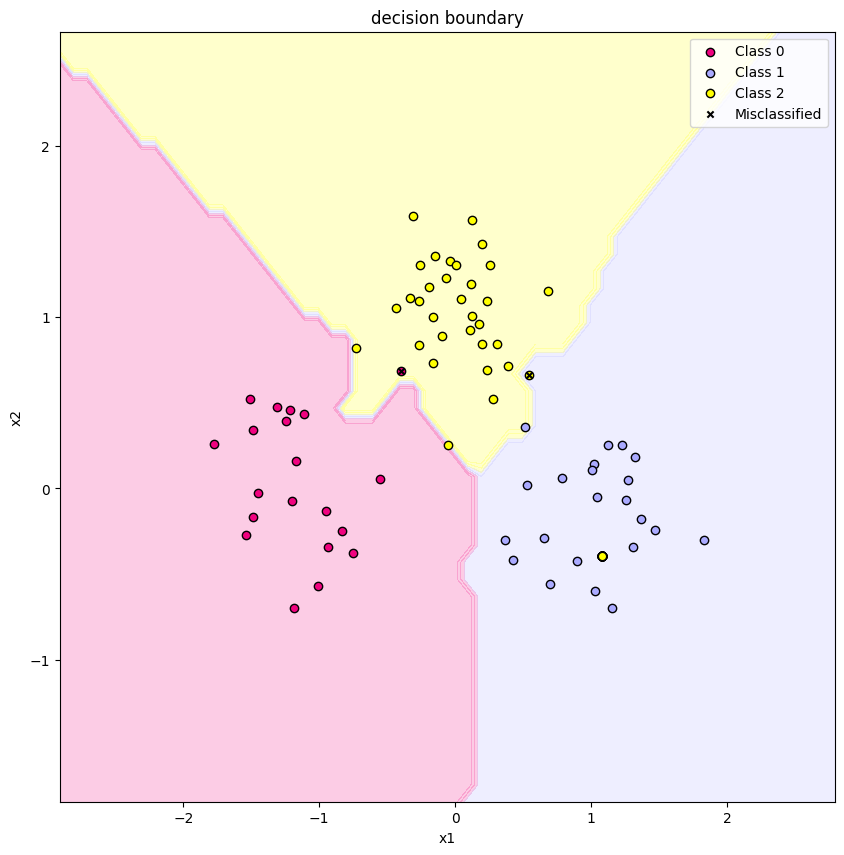

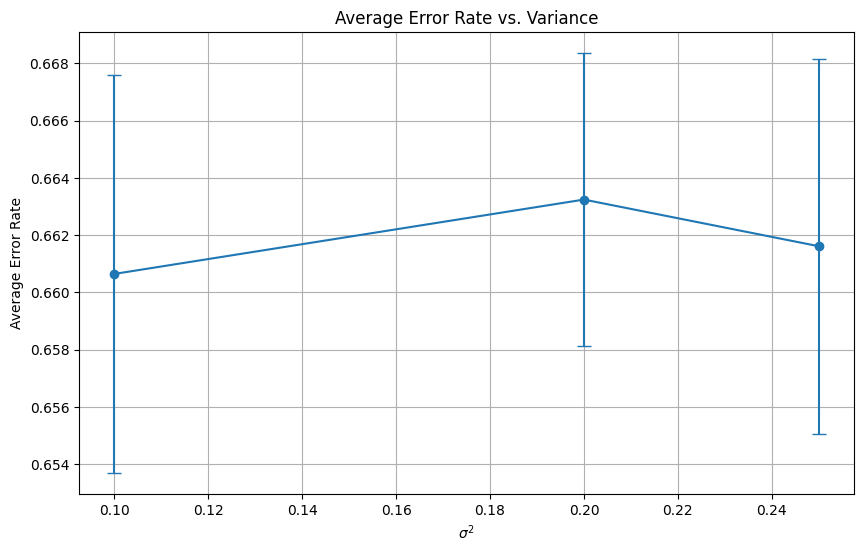

In [5]:
sigma_values = [0.10, 0.20, 0.25]
k = 1
repetitions = 50
error_rates = {sigma: [] for sigma in sigma_values}

N = 300
means = np.array([[-1, 0], [1, 0], [0, 1]])
x, y = genData(N, means, np.sqrt(0.10))
xTrain, yTrain, xTest, yTest = splitData(x, y, 0.75)

yPred = knnClassifier(k, xTrain, yTrain, xTest)

plotDataKNN(k, xTrain, yTrain, xTest, yTest, yPred)

for sigma in sigma_values:
    for _ in range(repetitions):
        x, y = genData(N, means, np.sqrt(sigma))
        xTrain, yTrain, xTest, yTest = splitData(x, y, 0.75)
        yPred = knnClassifier(k, xTrain, yTrain, xTest)
        error = l01Loss(yTest, yPred)
        error_rates[sigma].append(error)

avg_errors = [np.mean(error_rates[sigma]) for sigma in sigma_values]
std_errors = [np.std(error_rates[sigma]) for sigma in sigma_values]

plt.figure(figsize=(10,6))
plt.errorbar(sigma_values, avg_errors, yerr=std_errors, fmt='o-', capsize=5)
plt.title('Average Error Rate vs. Variance')
plt.xlabel('$\sigma^2$')
plt.ylabel('Average Error Rate')
plt.grid(True)
plt.show()


###Commentary:
The k-NN model shows uneven decision boundaries, highlighting its sensitivity to specific data points. Most errors happen where classes mix near boundaries. The best performance is at a variance of $\sigma^2 = 0.20.

We use here **K-Fold Cross Validation**, a technique used for model validation.

Suppose we are given $N$ (classification) models $h_i \in \mathcal{H}, i=\{1, \cdots, N\}$, a training set $(\mathbf{x}_{train}, y_{train})$, and a test set $(\mathbf{x}_{test}, y_{test})$.

Split the training set $(\mathbf{x}_{train}, y_{train})$ into $k$ folds, use $(k-1)$ folds to train and one fold to validate. Cycle through all folds, as shown in Figure 4, where we consider a different fold for testing at each cycle. For each model we report the average error of the $k$ folds.

The selected model is the one with the smallest average error:

$$ h_{best} = \arg\min_{h_i \in \mathcal{H}} \frac{1}{k} \sum^{k}_{j=1}err(y_{valid}^{(j)}, \hat{y}_{valid}^{(j)}) \quad  i=\{1, \cdots, N\}$$

Once the model is selected, it is trained with the entire training set (with the validation part) $(\mathbf{x}_{train}, y_{train})$, and tested over the test data $(\mathbf{x}_{test}, y_{test})$.

<img src="https://i.ibb.co/KKWPLgk/1-AAw-Il-HM8-Tp-AVe4l2-Fih-NUQ.png" alt="1-AAw-Il-HM8-Tp-AVe4l2-Fih-NUQ" border="0" width=500>

*Figure 4: Visualization of the K-Fold Cross Validation training data splitting*





### Question 2:
With $\sigma^2 = 0.10$ and $5$ folds for the Cross Validation:
- Generate the dataset as in question 1, with a 75/25 training/test proportion.
- Compute the average error for each $k$-NN model, $k\in\{1,2,\ldots, 5\} $ (these are the "validation error" for each $k$). Plot the validation error as a function of $k$. Comment.
- Fit the best model on the entire training set and compute its error on the test set (plot the generated points as in question 1). Compare this error with validation error of the best model.
- Is there a better configuration of the number of folds to consider (e.g. $9$ or $15$ folds) ?

*Hint: Use* `sklearn.model_selection.KFold` *to split data.*

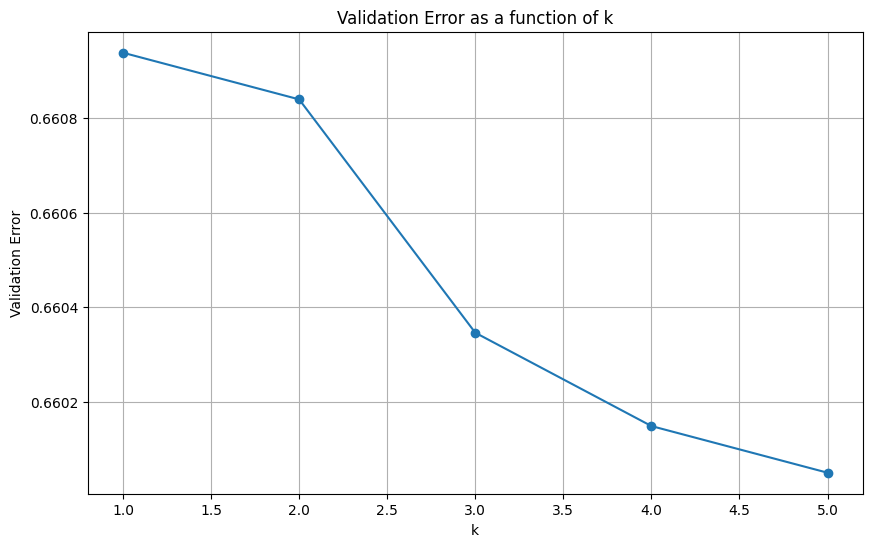

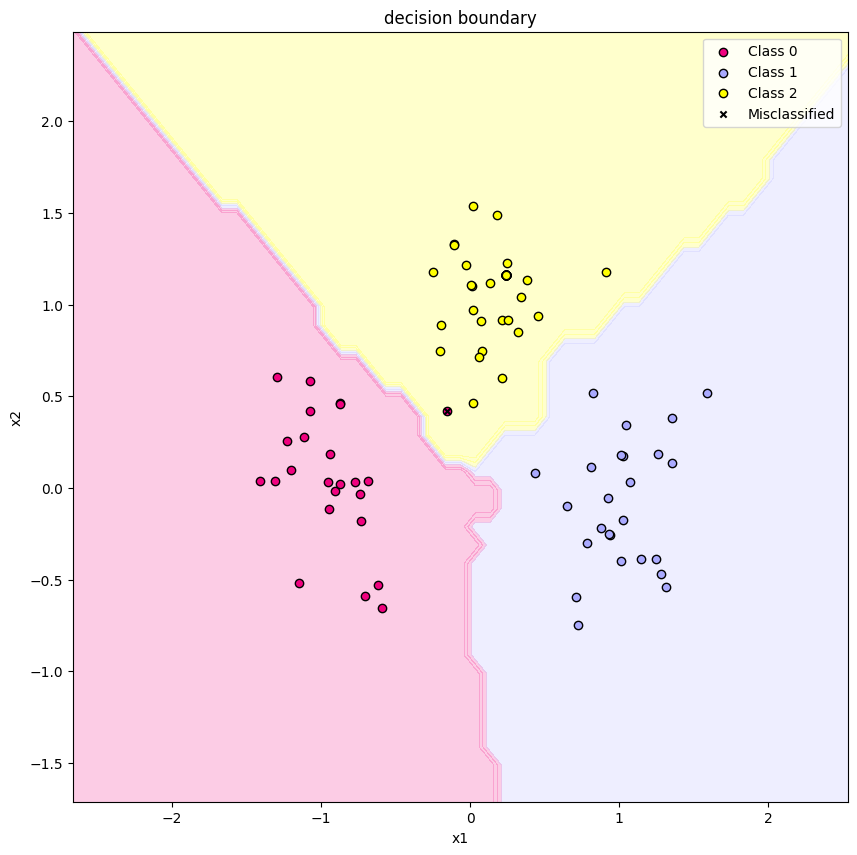

Validation error for best model (k=5): 0.6600
Test error for best model (k=5): 0.6660


In [6]:
from sklearn.model_selection import KFold

sigma = 0.10
N = 300
means = np.array([[-1, 0], [1, 0], [0, 1]])
k_values = range(1, 6)
n_splits = 5
errors = []

x, y = genData(N, means, np.sqrt(sigma))
xTrain, yTrain, xTest, yTest = splitData(x, y, 0.75)

kf = KFold(n_splits=n_splits)

for k in k_values:
    k_errors = []

    for train_index, valid_index in kf.split(xTrain):
        X_train_fold, X_valid_fold = xTrain[train_index], xTrain[valid_index]
        y_train_fold, y_valid_fold = yTrain[train_index], yTrain[valid_index]

        yPred_valid = knnClassifier(k, X_train_fold, y_train_fold, X_valid_fold)

        error = l01Loss(y_valid_fold, yPred_valid)
        k_errors.append(error)

    errors.append(np.mean(k_errors))

plt.figure(figsize=(10,6))
plt.plot(k_values, errors, '-o')
plt.xlabel('k')
plt.ylabel('Validation Error')
plt.title('Validation Error as a function of k')
plt.grid(True)
plt.show()

best_k = k_values[np.argmin(errors)]
yPred = knnClassifier(best_k, xTrain, yTrain, xTest)
test_error = l01Loss(yTest, yPred)

plotDataKNN(best_k, xTrain, yTrain, xTest, yTest, yPred)

print(f"Validation error for best model (k={best_k}): {min(errors):.4f}")
print(f"Test error for best model (k={best_k}): {test_error:.4f}")


## $k$-Means algorithm for clustering


### Question 3
Generate the data set with the same function from Question 2 with $\sigma^2 = 0.15$.

- Group the data set into three clusters $(k=3)$ using the $k$-Means algorithm with respect to the Euclidean distance.
- Repeat it with $k \in \{2, 4, 6\}$.
- Visualize all data set and the centroids at the convergence for each $k$. Comment.

In [7]:
def kMeans(k, x):
  """
  k-Means Clustering of the data set with k centroids

  Parameters
  -----------
  `k`: k-Means parameter (Number of centroids)
  `x`: Input data

  Returns
  -------
  `centroids`: Coordinates of the centroids
  `labels`: Assigned clusters for each data point
  """
  centroids = x[np.random.choice(x.shape[0], k, replace=False), :]

  prev_centroids = np.zeros(centroids.shape)
  labels = np.zeros(x.shape[0])
  while not (centroids == prev_centroids).all():
      for i in range(x.shape[0]):
          distances = np.linalg.norm(x[i] - centroids, axis=1)
          labels[i] = np.argmin(distances)

      prev_centroids = centroids.copy()
      for i in range(k):
          centroids[i] = x[labels == i].mean(axis=0)

  return centroids, labels


def plotDataKMeans(x, labels, centroids):
  """
  Plot the data set, visualize the clusters and the centroids

  Parameters
  -----------
  `k`: k-Means parameter (Number of centroids)
  `labels`: Assigned clusters for each data point
  `centroids`: Coordinates of the centroids
  """
  plt.figure(figsize=(8, 6))

  for i in range(centroids.shape[0]):
      plt.scatter(x[labels == i][:, 0], x[labels == i][:, 1], label=f"Cluster {i+1}")

  plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.legend()
  plt.title("kMeans Clustering")
  plt.grid(True)
  plt.show()

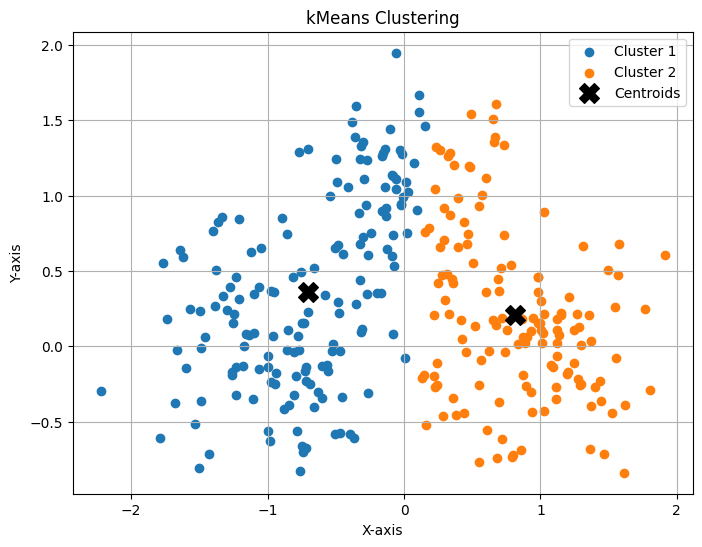

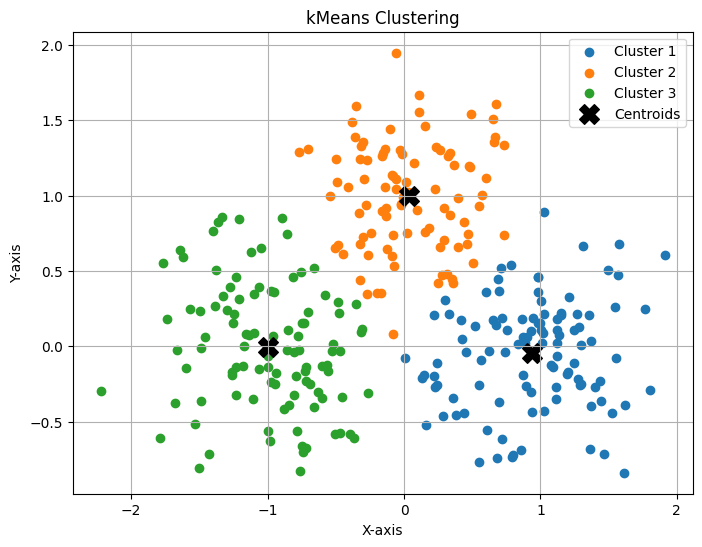

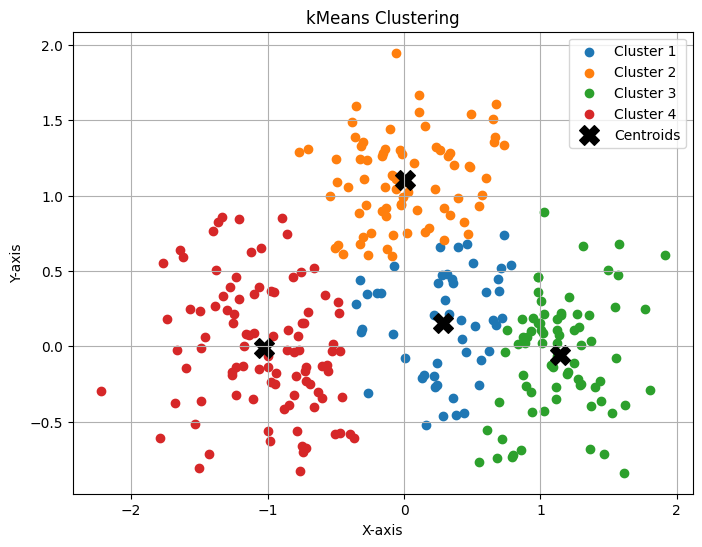

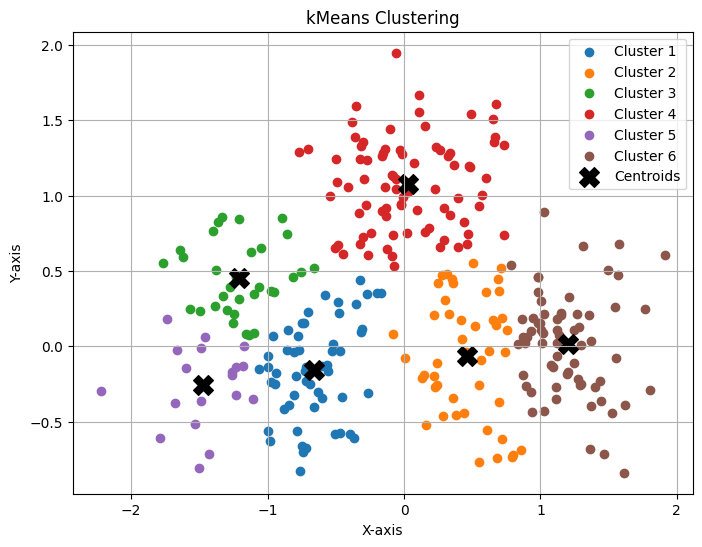

In [8]:
sigma = 0.15
x_kmeans, _ = genData(N, means, np.sqrt(sigma))

k_values = [2, 3, 4, 6]

for k in k_values:
    centroids, labels = kMeans(k, x_kmeans)
    plotDataKMeans(x_kmeans, labels, centroids)


### Question 4
- Generate the data set with $\sigma^2 \in \{0.10, 0.25, 0.50\}$.
- For each $\sigma^2$, group the data set into three clusters $(k=3)$ using the $k$-Means algorithm with respect to the Euclidean distance.
- Visualize all data with the centroids that generated the input data, i.e. $\{(-1, 0), (1, 0), (0, 1)\}$ for each $\sigma^2$. Comment.

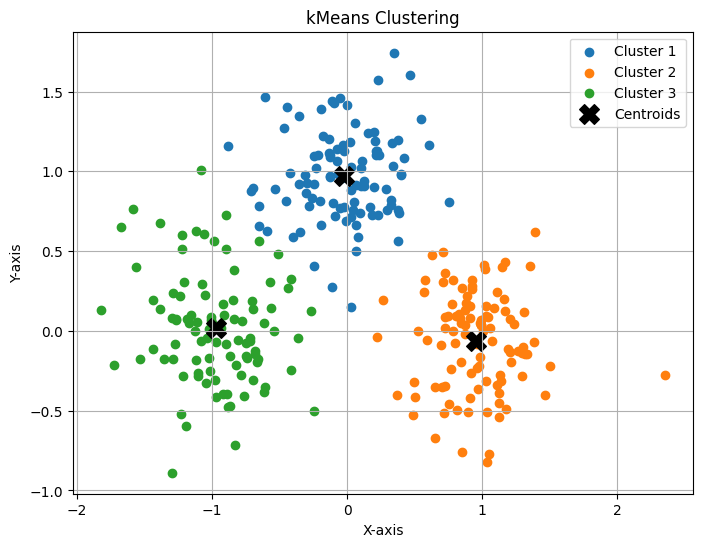

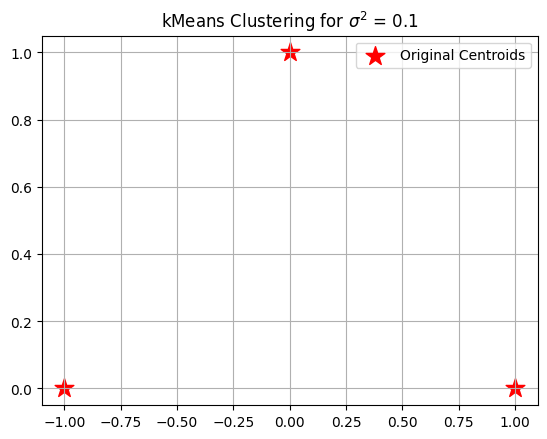

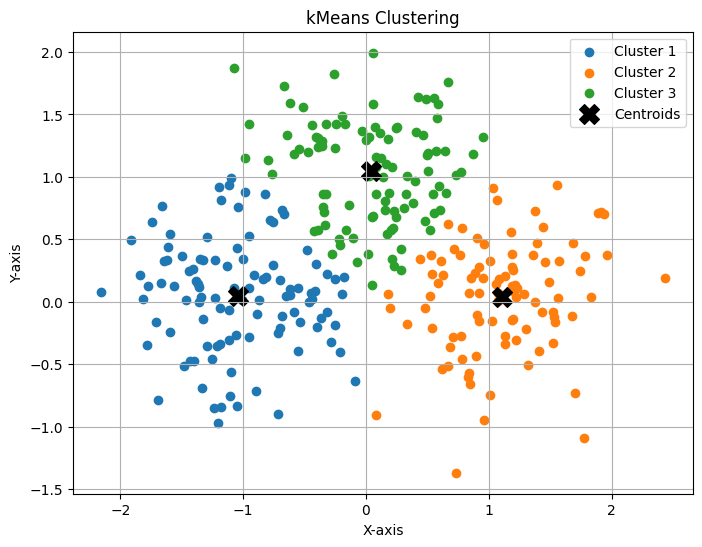

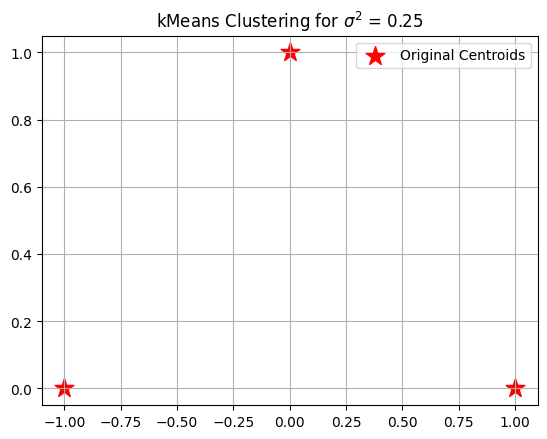

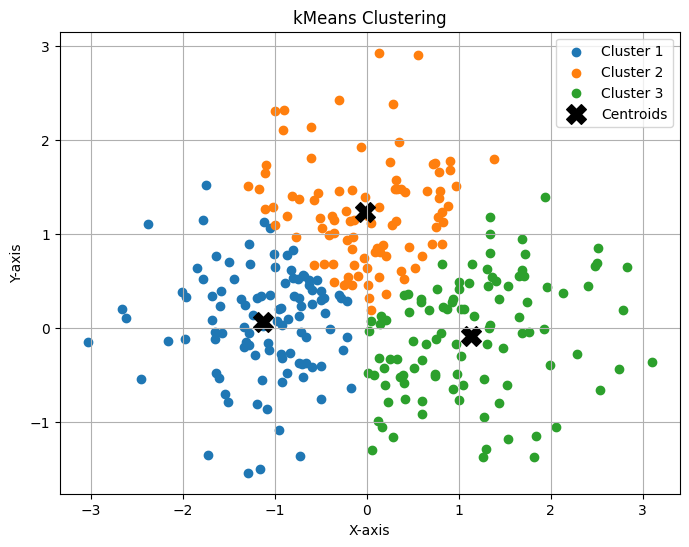

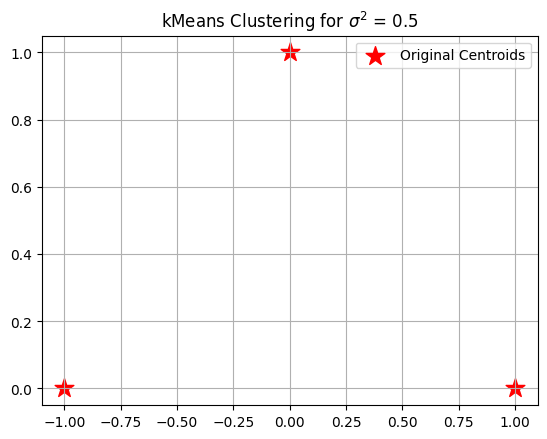

In [9]:
means = np.array([[-1, 0], [1, 0], [0, 1]])
N = 300

sigma_values = [0.10, 0.25, 0.50]

for sigma in sigma_values:
    x, y = genData(N, means, np.sqrt(sigma))

    centroids, labels = kMeans(3, x)

    plotDataKMeans(x, labels, centroids)

    plt.scatter(means[:, 0], means[:, 1], s=200, c='red', marker='*', label='Original Centroids')
    plt.legend()
    plt.title(f"kMeans Clustering for $\sigma^2$ = {sigma}")
    plt.grid(True)
    plt.show()

# Part 2: Real data

## $k$-NN regression : Szefed-weather data-set
In this part we will apply the k-NN algorithm for prediction.

Let’s use the Szeged-weather data set that can be downloaded in <code>https://www.kaggle.com/budincsevity/szeged-weather/data</code>.

We want to predict the apparent temperature given humidity and temperature. Apparent temperature is a notion of temperature that reflects human perception.

**Short description:** The Szeged-weather data set set is a daily/hourly summary for Szeged, Hungary area, between $2006$ and $2016$, in terms of temperature, humidity, apparent temperature, pressure, wind speed, among other measurements.

**Data Preparation:** For simplicity we will consider only three attributes: apparent temperature, humidity, and temperature, and only the first $2000 $ samples of the data set. We will use K-Fold Cross Validation with $5$ folds.

### Question 5:
Visualize all data set in terms of temperature (x-axis), humidity (y-axis), and apparent temperature (color). You should obtain a figure similar to Figure 5a.

<img src="https://i.ibb.co/zrksRTq/Screenshot-2022-10-23-164818.png" alt="Screenshot-2022-10-23-164818" border="0">

*Figure 5: Visualization of three attributes of the Szeged-weather data set: (a) shows all data set and (b) shows only the first 2000 samples of the data set.*

In [11]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory (1).csv


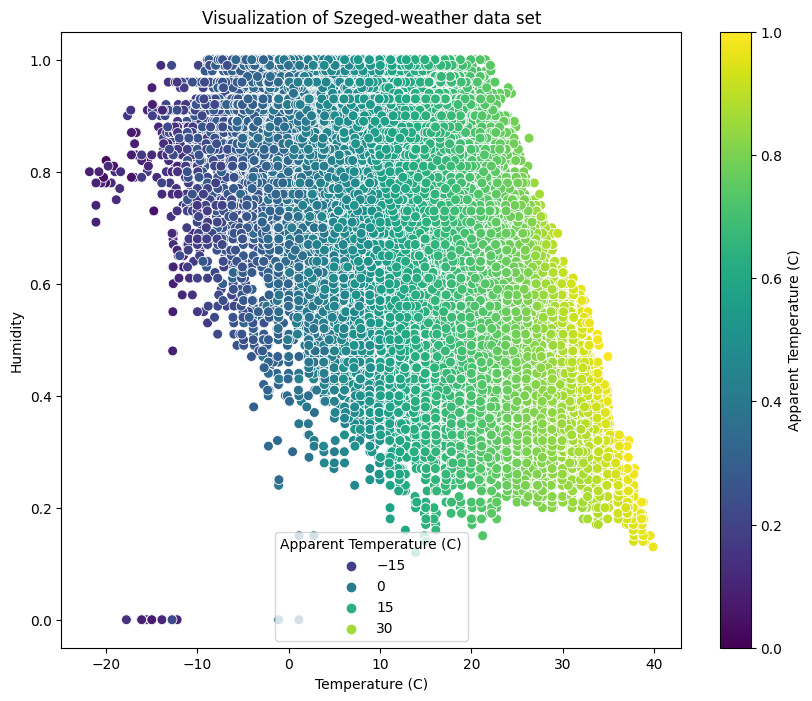

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('weatherHistory.csv')
data = data[['Temperature (C)', 'Humidity', 'Apparent Temperature (C)']]

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=data['Temperature (C)'],
                          y=data['Humidity'],
                          hue=data['Apparent Temperature (C)'],
                          palette='viridis',
                          s=50)

plt.title('Visualization of Szeged-weather data set')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')

cbar = plt.colorbar(scatter.collections[0])
cbar.set_label('Apparent Temperature (C)')

plt.show()



### Question 6:
- Consider the first $2000$ samples of the data set, and plot them. You should get Figure 5b.
- The prediction, given by the $k$-NN algorithm, is computed by taking into account the average of the values of $k$ nearest neighbors. Predict the apparent temperature given humidity and temperature using the $k$-NN algorithm with respect to the Euclidean distance for $k = 1$.
- Compute the mean squared error of the test data set.

In [16]:
def knnRegressor(k, xTrain, yTrain, xTest):
  """
  Prediction with KNN

  Parameters
  -----------
  `k`: kNN parameter (number of neighbors to consider)
  `xTrain`: Input data for training
  `yTrain`: True Values for training
  `xTest`: Input data for testing

  Returns
  -------
  `yPred`: Predicted Values
  """
  yPred = []
  for test_sample in xTest:
      distances = [euclidean_distance(test_sample, x) for x in xTrain]
      k_neighbors_indices = np.argsort(distances)[:k]
      k_neighbor_output = [yTrain[i] for i in k_neighbors_indices]
      prediction = np.mean(k_neighbor_output)
      yPred.append(prediction)
  return np.array(yPred)

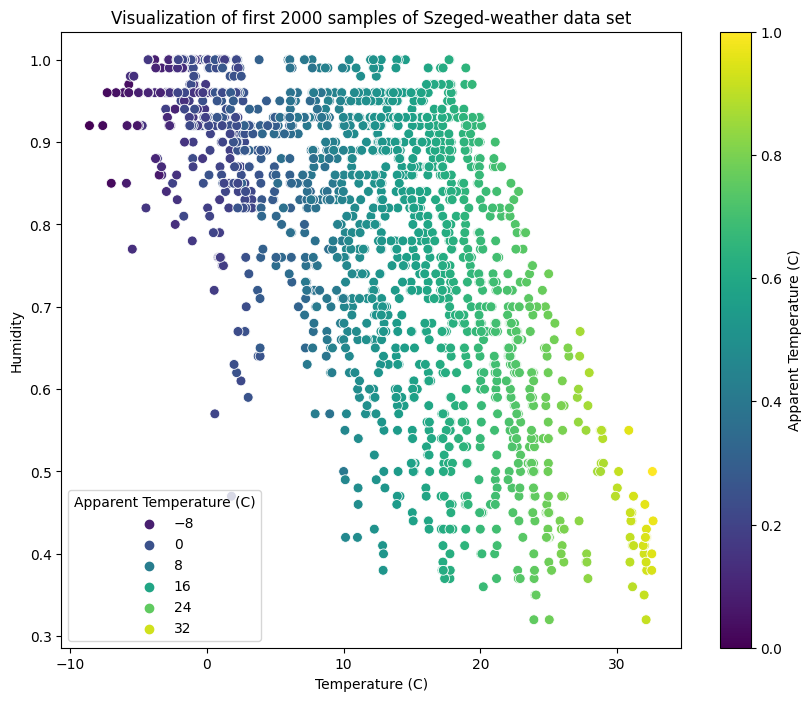

Mean Squared Error for k=1: 6.6554270833333335


In [17]:
plt.figure(figsize=(10, 8))
data = data[['Temperature (C)', 'Humidity', 'Apparent Temperature (C)']].iloc[:2000]
scatter = sns.scatterplot(x=data['Temperature (C)'],
                          y=data['Humidity'],
                          hue=data['Apparent Temperature (C)'],
                          palette='viridis',
                          s=50)

plt.title('Visualization of first 2000 samples of Szeged-weather data set')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
cbar = plt.colorbar(scatter.collections[0])
cbar.set_label('Apparent Temperature (C)')
plt.show()

split = int(0.8 * len(data))
xTrain = data[['Temperature (C)', 'Humidity']].iloc[:split].values
yTrain = data['Apparent Temperature (C)'].iloc[:split].values
xTest = data[['Temperature (C)', 'Humidity']].iloc[split:].values
yTest = data['Apparent Temperature (C)'].iloc[split:].values

yPred = knnRegressor(1, xTrain, yTrain, xTest)

mse = np.mean((yTest - yPred) ** 2)
print(f"Mean Squared Error for k=1: {mse}")


### Question 7:
- Perform K-Fold Cross Validation with $5$ Folds with different numbers of neighbors $k \in \{1, 3, 5, 7, 10, 15\}$, and showcase the best model.
- Plot the mean squared error of the test data set *versus* the parameter $k$, use error bars to represent the standard deviation of the error for each model. Comment.

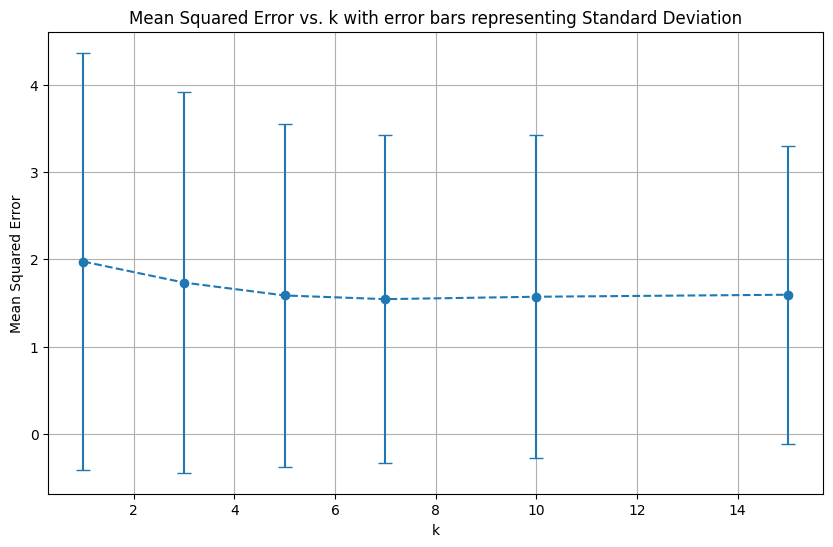

The best model uses k=7 with an MSE of 1.5445.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

K_folds = 5

k_values = [1, 3, 5, 7, 10, 15]

all_mse = {}
for k in k_values:
    all_mse[k] = []

fold_size = len(data) // K_folds
folds = [data.iloc[i * fold_size:(i + 1) * fold_size] for i in range(K_folds)]

for i in range(K_folds):
    test_data = folds[i]
    train_data = pd.concat([folds[j] for j in range(K_folds) if j != i], ignore_index=True)

    xTrain = train_data[['Temperature (C)', 'Humidity']].values
    yTrain = train_data['Apparent Temperature (C)'].values
    xTest = test_data[['Temperature (C)', 'Humidity']].values
    yTest = test_data['Apparent Temperature (C)'].values

    for k in k_values:
        yPred = knnRegressor(k, xTrain, yTrain, xTest)
        mse = np.mean((yTest - yPred) ** 2)
        all_mse[k].append(mse)

mean_errors = {k: np.mean(mse) for k, mse in all_mse.items()}
std_errors = {k: np.std(mse) for k, mse in all_mse.items()}

plt.figure(figsize=(10, 6))
plt.errorbar(k_values,
             [mean_errors[k] for k in k_values],
             yerr=[std_errors[k] for k in k_values],
             capsize=5, marker='o', linestyle='--')

plt.title('Mean Squared Error vs. k with error bars representing Standard Deviation')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

best_k = min(mean_errors, key=mean_errors.get)
print(f"The best model uses k={best_k} with an MSE of {mean_errors[best_k]:.4f}.")


---
# Comments of the students:

To improve the experience of students that will take the course on the future any thoughtful comment or suggestion will be much appreciated!

**Comments:**

# Some References:

https://www.youtube.com/watch?v=09mb78oiPkA : $k$-NN

https://www.youtube.com/watch?v=hDmNF9JG3lo : $k$-Means

https://www.youtube.com/watch?v=uoTBdCODGvk : Model Selection and Cross Validation

https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/ : Numpy Broadcasting and Vectorization